In [3]:
!kaggle datasets download -d rounakbanik/the-movies-dataset 

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0




  0%|          | 0.00/228M [00:00<?, ?B/s]
  0%|          | 1.00M/228M [00:00<03:09, 1.25MB/s]
  1%|          | 2.00M/228M [00:00<01:37, 2.42MB/s]
  1%|▏         | 3.00M/228M [00:01<01:08, 3.44MB/s]
  2%|▏         | 4.00M/228M [00:01<00:52, 4.51MB/s]
  2%|▏         | 5.00M/228M [00:01<00:42, 5.53MB/s]
  3%|▎         | 6.00M/228M [00:01<00:36, 6.39MB/s]
  4%|▎         | 8.00M/228M [00:01<00:28, 8.01MB/s]
  4%|▍         | 10.0M/228M [00:01<00:25, 8.91MB/s]
  5%|▍         | 11.0M/228M [00:01<00:25, 9.06MB/s]
  5%|▌         | 12.0M/228M [00:02<00:24, 9.14MB/s]
  6%|▌         | 13.0M/228M [00:02<00:26, 8.46MB/s]
  6%|▌         | 14.0M/228M [00:02<00:27, 8.19MB/s]
  7%|▋         | 16.0M/228M [00:02<00:23, 9.55MB/s]
  7%|▋         | 17.0M/228M [00:02<00:22, 9.64MB/s]
  8%|▊         | 19.0M/228M [00:02<00:20, 10.6MB/s]
  9%|▉         | 20.0M/228M [00:02<00:20, 10.4MB/s]
 10%|▉         | 22.0M/228M [00:03<00:21, 10.0MB/s]
 10%|█         | 23.0M/228M [00:03<00:23, 8.99MB/s]
 11%|█         | 25.

In [2]:
import zipfile
import os

zip_file_path = 'the-movies-dataset.zip'

extract_to = 'data'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

os.remove(zip_file_path)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pa
from scipy.linalg import svd, diagsvd

In [5]:
import pandas as pd
df = pd.read_csv('data/ratings_small.csv')
df.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


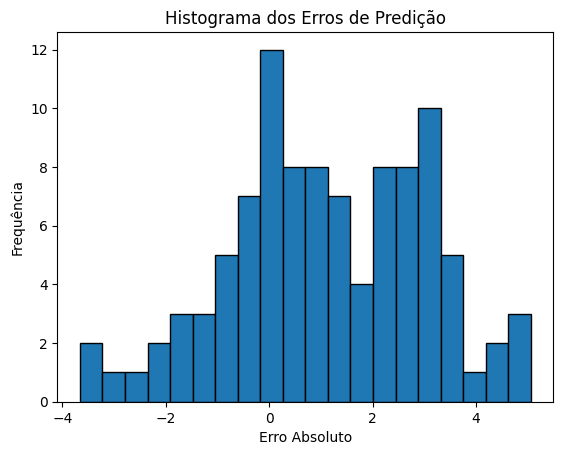

In [21]:
ratings = df[['userId', 'movieId', 'rating']]
rating_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

def decompose_matrix_and_predict(matrix, i, j):
    """
    Decompõe a matriz usando SVD e tenta prever o valor da célula (i, j).
    """
    U, sigma, VT = svd(matrix, full_matrices=False)
    sigma[-170:] *= 0
    Sigma = np.diag(sigma)
    
    B_approx = np.dot(U, np.dot(Sigma, VT))
    
    return B_approx[i, j]

num_experimentos = 100
erros = []

while len(erros) < num_experimentos:
    i = np.random.randint(0, rating_matrix.shape[0])
    j = np.random.randint(0, rating_matrix.shape[1])
    
    original_value = rating_matrix.iloc[i, j]
    
    if original_value == 0:
        continue
    
    matrix_corrupted = rating_matrix.copy()
    matrix_corrupted.iloc[i, j] = np.random.uniform(0, 5)
    
    predicted_value = decompose_matrix_and_predict(matrix_corrupted.values, i, j)
    
    error = original_value - predicted_value
    erros.append(error)

plt.hist(erros, bins=20, edgecolor='black')
plt.title('Histograma dos Erros de Predição')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.show()